In [1]:
#Svi importovi
import nltk
import subprocess
import nltk.corpus  
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, brown
from collections import Counter
from nltk.text import Text 
import os
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
path_to_gs = "C:\Program Files\gs\gs9.56.1"
os.environ['PATH']+=os.pathsep + path_to_gs

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Maks\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Učitavanje knjige
book = open("godfather_2.txt", "r", encoding = "UTF-8")
book_txt = book.read()

In [3]:
#1. Normalizacija
book_lowercase = book_txt.lower()
print(book_lowercase[0:300])

chapter twelve 


jo hn nt fontane wavcd a casual dismissal to the manservant 
and said, ‘ sec you in the morning, billy. ’ itie coloured butler 
bowed his way out of the huge dining room-living room with 
its view of the pacific ocean. it was a friendly-goodbye sort of 
bow, not a servant's bow, an


In [4]:
#2. Tokenizacija
book_tokenized = sent_tokenize(book_lowercase)
print('Broj rečenica: ', len(book_tokenized))

book_tokens = word_tokenize(book_lowercase)
print('Broj tokena: ', len(book_tokens))

Broj rečenica:  1844
Broj tokena:  34448


In [5]:
#3. Pročišćavanje teksta
book_tokens_clean = [word for word in book_tokens if word.isalpha()]
print('Broj tokena nakon pročišćavanja: ', len(book_tokens_clean))

Broj tokena nakon pročišćavanja:  29248


In [6]:
#4. Stemming
book_stemmed = []
ps = nltk.PorterStemmer()
for word in book_tokens_clean:
    book_stemmed.append(ps.stem(word))
    
print(book_stemmed[0:100])

['chapter', 'twelv', 'jo', 'hn', 'nt', 'fontan', 'wavcd', 'a', 'casual', 'dismiss', 'to', 'the', 'manserv', 'and', 'said', 'sec', 'you', 'in', 'the', 'morn', 'billi', 'iti', 'colour', 'butler', 'bow', 'hi', 'way', 'out', 'of', 'the', 'huge', 'dine', 'room', 'with', 'it', 'view', 'of', 'the', 'pacif', 'ocean', 'it', 'wa', 'a', 'sort', 'of', 'bow', 'not', 'a', 'servant', 'bow', 'and', 'given', 'onli', 'becaus', 'johnni', 'fontan', 'had', 'compani', 'for', 'dinner', 'johnni', 'compani', 'wa', 'a', 'girl', 'name', 'sharon', 'moor', 'a', 'new', 'york', 'qti', 'greenwich', 'villag', 'girl', 'in', 'hollywood', 'to', 'tri', 'for', 'a', 'small', 'part', 'in', 'a', 'movi', 'be', 'produc', 'by', 'an', 'old', 'flame', 'who', 'had', 'made', 'the', 'big', 'time', 'she', 'had']


In [7]:
#5. Lematizacija
wnl = nltk.WordNetLemmatizer()
book_lemmatized = []
for word in book_tokens_clean:
    book_lemmatized.append(wnl.lemmatize(word))

print(book_lemmatized[0:50])

['chapter', 'twelve', 'jo', 'hn', 'nt', 'fontane', 'wavcd', 'a', 'casual', 'dismissal', 'to', 'the', 'manservant', 'and', 'said', 'sec', 'you', 'in', 'the', 'morning', 'billy', 'itie', 'coloured', 'butler', 'bowed', 'his', 'way', 'out', 'of', 'the', 'huge', 'dining', 'room', 'with', 'it', 'view', 'of', 'the', 'pacific', 'ocean', 'it', 'wa', 'a', 'sort', 'of', 'bow', 'not', 'a', 'servant', 'bow']


In [8]:
#6. Uklanjanje stop riječi
book_removed_stop_words = [token for token in book_lemmatized if not token in stopwords.words("english")]
print(book_removed_stop_words[0:50])

['chapter', 'twelve', 'jo', 'hn', 'nt', 'fontane', 'wavcd', 'casual', 'dismissal', 'manservant', 'said', 'sec', 'morning', 'billy', 'itie', 'coloured', 'butler', 'bowed', 'way', 'huge', 'dining', 'room', 'view', 'pacific', 'ocean', 'wa', 'sort', 'bow', 'servant', 'bow', 'given', 'johnny', 'fontane', 'company', 'dinner', 'johnny', 'company', 'wa', 'girl', 'named', 'sharon', 'moore', 'new', 'york', 'qty', 'greenwich', 'village', 'girl', 'hollywood', 'try']


[('wa', 488), ('said', 189), ('johnny', 184), ('vito', 144), ('would', 124), ('corleone', 122), ('could', 108), ('one', 95), ('nino', 92), ('man', 88)]


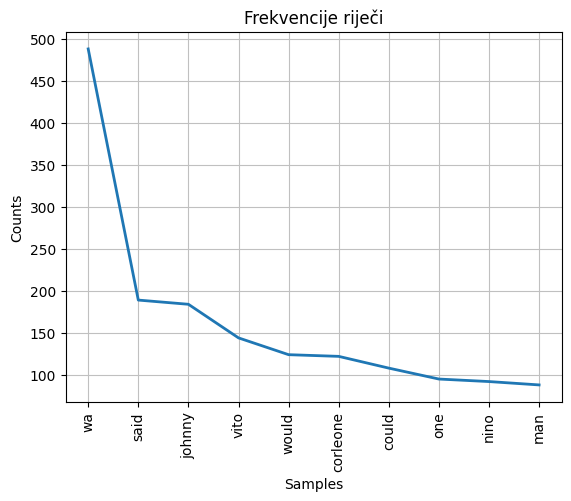

<AxesSubplot:title={'center':'Frekvencije riječi'}, xlabel='Samples', ylabel='Counts'>

In [9]:
#7. Frekvencije riječi

word_count = Counter(book_removed_stop_words)
print(word_count.most_common(10))

fd = nltk.FreqDist(book_removed_stop_words)
frequency = fd.most_common(10)
fd.plot(10,title='Frekvencije riječi')

In [10]:
#8. Concordance za najfrekventnije riječi

frequency2 = []

for token in frequency:
    frequency2.append(token[0])

tokens1 = nltk.word_tokenize(book_txt)
text1 = nltk.Text(book_removed_stop_words)

for token in frequency2:
    text1.concordance(token)
    print("\n")

Displaying 25 of 488 matches:
y huge dining room view pacific ocean wa sort bow servant bow given johnny fon
fontane company dinner johnny company wa girl named sharon moore new york qty 
lame made big time visited set johnny wa acting movie johnny found young fires
pproach never slept girl unless foere wa something really liked except course 
 really liked except course sometimes wa drunk found self bed girl even rememb
bed girl even remember meeting seeing wa year old estranged second wife maybe 
pubic scalp dangling bdt simply eager wa something sharon moore aroused affect
pretty clothes usually big eater date wa plenty food table wa also plenty liqu
y big eater date wa plenty food table wa also plenty liquor champagne bucket s
ome playing record sharon asked voice wa teasing johnny smiled wa amused teasi
 asked voice wa teasing johnny smiled wa amused teasing wood said play said si
dy needed warm cheer charge situation wa reverse lover usual one get drunk ins
usual one get drunk in

In [11]:
#9. Kolokacije

text1 = nltk.Text(tokens1)
text1.collocation_list()

[('Vito', 'Corleone'),
 ('New', 'York'),
 ('Johnny', 'Fontane'),
 ('hundred', 'dollars'),
 ('Deanna', 'Dunn'),
 ('Johnny', 'said'),
 ('seven', 'hundred'),
 ('Jack', 'Woltz'),
 ('Genco', 'Abbandando'),
 ('air', 'shaft'),
 ('olive', 'oil'),
 ('living', 'room'),
 ('Mrs', 'Colombo'),
 ('Long', 'Beach'),
 ('United', 'States'),
 ('second', 'wife'),
 ('apart-', 'ment'),
 ('grocery', 'store'),
 ('Eddie', 'Neils'),
 ('Academy', 'Award')]

In [12]:
#10. Leksički diverzitet

def lexical_diversity(text):
    return len(set(text)) / len(text)

print(lexical_diversity(book_removed_stop_words))

0.2633434734513274


In [13]:
#11: Primjena Brown korpusa

categories = brown.categories()

for category in categories:
    print(f"Kategorija {category}: ")
    genre_text = brown.words(categories = category)
    freq_dist = nltk.FreqDist(genre_text)
    for word in book_removed_stop_words[0:100]:
        print(word + ':', freq_dist[word], end=', ')
    print('\n')

Kategorija adventure: 
chapter: 0, twelve: 0, jo: 0, hn: 0, nt: 0, fontane: 0, wavcd: 0, casual: 2, dismissal: 0, manservant: 2, said: 287, sec: 0, morning: 27, billy: 0, itie: 0, coloured: 0, butler: 0, bowed: 0, way: 65, huge: 3, dining: 2, room: 33, view: 6, pacific: 0, ocean: 0, wa: 0, sort: 15, bow: 2, servant: 1, bow: 2, given: 3, johnny: 0, fontane: 0, company: 10, dinner: 6, johnny: 0, company: 10, wa: 0, girl: 53, named: 8, sharon: 0, moore: 0, new: 22, york: 0, qty: 0, greenwich: 0, village: 4, girl: 53, hollywood: 0, try: 14, small: 35, part: 21, movie: 0, produced: 1, old: 38, flame: 5, made: 77, big: 50, time: 127, visited: 3, set: 17, johnny: 0, wa: 0, acting: 0, movie: 0, johnny: 0, found: 36, young: 24, firesh: 0, charming: 1, witty: 0, asked: 33, come: 61, place: 39, dinner: 6, evening: 9, invitation: 0, dinner: 6, already: 16, famous: 1, force: 6, royalty: 0, course: 16, said: 287, yes: 5, sharon: 0, moore: 0, obviously: 1, expected: 10, come: 61, strong: 17, reputati

In [14]:
#12. Tagiranje riječi i lingvističko stablo

list1 = book_tokenized[200]
tokens1 = word_tokenize(list1)
print(tokens1)
list_tokens1 = nltk.pos_tag(word_tokenize(list1))
list_tokens1

['*', 'she', 'didn', '’', 't', 'answer', 'him', '.']


[('*', 'NN'),
 ('she', 'PRP'),
 ('didn', 'VBZ'),
 ('’', 'JJ'),
 ('t', 'NNS'),
 ('answer', 'VBP'),
 ('him', 'PRP'),
 ('.', '.')]

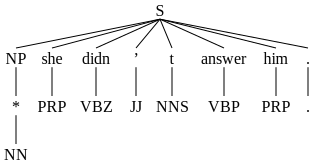

In [16]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" 
parser1 = nltk.RegexpParser(grammar_np)
result1 = parser1.parse(list_tokens1)
result1

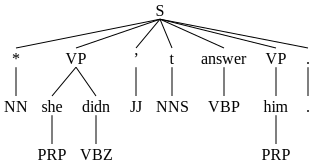

In [17]:
grammar_vp = r"VP: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"
parser2 = nltk.RegexpParser(grammar_vp)
list2 = list1
list_tokens2 = nltk.pos_tag(word_tokenize(list2))
list_tokens2
result2 = parser2.parse(list_tokens2)
result2